# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Oprah Winfrey
- Miley Cyrus
- Sam Smith
- J. Cole

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1) Forbes: Key Trends Impacting Burger King's Business
https://www.forbes.com/sites/greatspeculations/2014/07/01/key-trends-impacting-burger-kings-business/#14ec06933cd0
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

- Number of fast food restaurants
https://www.statista.com/statistics/196619/total-number-of-fast-food-restaurants-in-the-us-since-2002/
- McDonald's gross profit
https://www.macrotrends.net/stocks/charts/MCD/mcdonalds/gross-profit
- Beef prices
https://www.indexmundi.com/commodities/?commodity=beef&months=60
- Producer price index for potatos
https://fred.stlouisfed.org/series/WPU024502

# Setup

In [252]:
# imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot

In [56]:
df_yelp_mc = pd.read_csv('McDonalds-Yelp-Sentiment-DFE.csv', encoding = "ISO-8859-1")
df_yelp_mc

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."
5,679455658,False,finalized,3,2/21/15 0:13,BadFood\rSlowService,0.7111\r0.6444,Atlanta,NaN,This has to be one of the worst and slowest Mc...
6,679455659,False,finalized,3,2/21/15 0:36,SlowService\rScaryMcDs,0.6562\r0.6562,Atlanta,NaN,I'm not crazy about this McDonald's. Î¾This is...
7,679455660,False,finalized,3,2/21/15 0:15,RudeService,0.6801,Atlanta,NaN,One Star and I'm beng kind. I blame management...
8,679455661,False,finalized,3,2/21/15 0:29,SlowService\rRudeService\rMissingFood,1.0\r1.0\r0.6667,Atlanta,NaN,Never been upset about any fast food drive thr...
9,679455662,False,finalized,3,2/21/15 0:12,na,1,Atlanta,NaN,This McDonald's has gotten much better. Usuall...


In [57]:
df_yelp = pd.read_csv('yelp_business.csv')
df_yelp['name'] = df_yelp['name'].str.replace('"', '')
df_yelp[(df_yelp.name == "108 Chinese Take Away")]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
102999,9wSHuOEou6PkRd-GbfH47w,108 Chinese Take Away,NaN,"""108 Portobello High Street""",Edinburgh,EDH,EH15 1AL,55.953963,-3.115782,5.0,3,1,Restaurants;Fast Food


In [58]:
df_yelp[df_yelp['categories'].str.contains("Fast Food")]#.groupby(['name']).sum()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
45,rDMptJYWtnMhpQu_rRXHng,McDonald's,NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.607070,-112.064382,1.0,10,1,Fast Food;Burgers;Restaurants
53,4srfPk1s8nlm1YusyDUbjg,Subway,Southeast,"""6889 S Eastern Ave, Ste 101""",Las Vegas,NV,89119,36.064652,-115.118954,2.5,6,1,Fast Food;Restaurants;Sandwiches
72,iPa__LOhse-hobC2Xmp-Kw,McDonald's,NaN,"""1635 E Camelback Rd""",Phoenix,AZ,85016,33.508765,-112.046240,3.0,34,1,Restaurants;Burgers;Fast Food
113,sJ0MYSAIVK28cMzh-s-NPA,Amaya Express,Downtown Core,"""Eaton Centre, 220 Yonge St""",Toronto,ON,M5B 2L7,43.654067,-79.380081,2.5,34,1,Indian;Restaurants;Fast Food
116,gIVjdDWRnS1yDVpPF3oUeg,Pizza Pizza,Milliken,"""7665 Kennedy Road""",Markham,ON,L3R 0L7,43.841217,-79.303936,4.0,8,1,Italian;Chicken Wings;Fast Food;Restaurants;Pizza
122,Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,Eastside,"""3020 E Desert Inn Rd""",Las Vegas,NV,89121,36.130013,-115.109310,2.0,20,1,Restaurants;Fast Food;Burgers
130,MTH-AcNyWfsBa9sXp04HcQ,Firehouse Subs,NaN,"""3420 E Baseline Rd, Ste 101""",Mesa,AZ,85204,33.379621,-111.757160,3.5,82,1,Food;Delis;Fast Food;Sandwiches;Restaurants
135,SJAggfn8ta7XLD98XD2mkw,QDC Burger,Saint-Laurent,"""975 Boulevard Roméo-Vachon Nord""",Dorval,QC,H4Y 1H1,45.457264,-73.751584,3.0,11,1,Burgers;Fast Food;Restaurants
145,vzx1WdVivFsaN4QYrez2rw,Subway,NaN,"""5111 Boulder Hwy""",Las Vegas,NV,89122,36.112895,-115.062353,3.0,3,1,Sandwiches;Restaurants;Fast Food
179,GDOAg680Gmi6S1MlhU7B1g,Taco Bell,NaN,"""4110 Lee Road""",Cleveland,OH,44128,41.447893,-81.564678,2.0,5,1,Mexican;Tex-Mex;Restaurants;Fast Food


In [59]:
# read the list from beef price
df_list_beef = pd.read_html("https://www.indexmundi.com/commodities/?commodity=beef&months=60")

# table of beef price from May 2014 to April 2019
monthly_beef_price = df_list[1]

monthly_beef_price.describe()

beef_list = pd.read_html("https://www.indexmundi.com/commodities/?commodity=beef&months=60")

beef_df = beef_list[1]

In [121]:
# read the monthly potato price from 1990-12-01 to 2019-03-01
monthly_potato_price = pd.read_excel("Producer Price Index for Potato.xls")

print(monthly_potato_price)
# rename the producer price index
monthly_potato_price = monthly_potato_price.rename(index=str, columns={"WPU024502": "Price"})

monthly_potato_price.describe()

          DATE  WPU024502
0   1990-12-01      100.0
1   1991-01-01      100.8
2   1991-02-01      100.9
3   1991-03-01      100.7
4   1991-04-01      100.6
5   1991-05-01      100.6
6   1991-06-01      100.9
7   1991-07-01      101.0
8   1991-08-01      100.6
9   1991-09-01      100.9
10  1991-10-01      100.8
11  1991-11-01      101.1
12  1991-12-01      100.6
13  1992-01-01      100.4
14  1992-02-01       99.4
15  1992-03-01       99.5
16  1992-04-01       99.8
17  1992-05-01       99.7
18  1992-06-01       98.3
19  1992-07-01       98.6
20  1992-08-01       98.5
21  1992-09-01      100.4
22  1992-10-01      100.1
23  1992-11-01      102.1
24  1992-12-01      103.5
25  1993-01-01      103.2
26  1993-02-01      103.3
27  1993-03-01      103.4
28  1993-04-01      104.9
29  1993-05-01      105.9
..         ...        ...
310 2016-10-01      191.7
311 2016-11-01      192.1
312 2016-12-01      192.1
313 2017-01-01      196.3
314 2017-02-01      197.9
315 2017-03-01      197.9
316 2017-04-

,Price
count,340.000000
mean,140.988824
std,37.669898
min,98.300000
25%,109.400000
50%,119.950000
75%,188.425000
max,211.500000


In [122]:
establishments = pd.read_excel("Number of establishments in the United States fast food industry.xlsx")
establishments.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Statistic as Excel data file,NaN
2,NaN,Number of establishments in the United States ...,NaN
3,NaN,Access data,NaN
4,NaN,NaN,NaN


In [123]:
## YOUR CODE HERE

In [124]:
df_stock = pd.read_csv("McDonald's Stock.csv")



df_list = pd.read_html("https://www.macrotrends.net/stocks/charts/MCD/mcdonalds/revenue")
df_yearly = df_list[0]
df_quarterly = df_list[1]

# Data Cleaning

Describe your data cleaning steps here.

In [299]:
df_stock = pd.read_csv("McDonald's Stock.csv")



df_list = pd.read_html("https://www.macrotrends.net/stocks/charts/MCD/mcdonalds/revenue")
df_yearly = df_list[0]
df_quarterly = df_list[1]
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

#clean stock
df_stock_c = pd.DataFrame(df_stock[['Date', 'Close', 'Volume']])
df_stock_c['Value'] = df_stock_c.Close * df_stock_c.Volume
#print(df_stock_c)

df_stock_c['Quarter'] = np.nan
df_stock_c['Count'] = 1
for i in range(len(df_stock_c['Date'])):
    dates = df_stock_c['Date'][i].split('-')
    qt = (int(dates[0])-2013)*4 + int((int(dates[1])-1)/3) - 5
    df_stock_c.iloc[i, df_stock_c.columns.get_loc('Quarter')] = qt
    
df_stock_c.drop(df_stock_c[df_stock_c['Quarter'] < 0].index, inplace = True)
df_stk = pd.DataFrame(df_stock_c.groupby('Quarter').sum())
df_stk['Avg_Close'] = df_stk.Close / df_stk.Count
df_stk = pd.DataFrame(df_stk[['Volume', 'Value', 'Avg_Close']])


#stock cleaned, quarter 1 = 2013 Q4

#clean revenue

df_quarterly.columns = ['Date', 'Revenue']
df_quarterly['Quarter'] = np.nan
for j in range(len(df_quarterly['Date'])):
    dates = df_quarterly['Date'][j].split(' ')
    q = dates[0]
    q = q.replace('Q', '')
    qt = int(q) - 7 + ((int(dates[1])-2013) * 4)
    df_quarterly.iloc[j, df_quarterly.columns.get_loc('Quarter')] = qt
    df_quarterly.iloc[j, df_quarterly.columns.get_loc('Revenue')] = int(df_quarterly.iloc[j, df_quarterly.columns.get_loc('Revenue')].replace("$", '').replace(',', ''))

df_quarterly.drop(df_quarterly[df_quarterly['Quarter'] < 0].index, inplace = True)
df_quarterly.drop(df_quarterly[df_quarterly['Quarter'] > 14].index, inplace = True)


# clean beef price
price_q_df = pd.DataFrame(columns=['Quarter', 'Beef Price', 'Change'])

k = 0
average_price = 0
average_price_list = []
for i in beef_df['Price']:
    average_price = average_price + float(i)
    k = k + 1
    if k % 3 == 0:
        average_price_list.append(average_price/3)
        average_price = 0

average_change_list = []
average_change = 0
k = 0

for i in beef_df['Change']:
    if i == "-":
        average_change = 0
    else:
        if "-" in i:
            t = i.replace("-", " ")
            temp = t.split(" ")        
            average_change = average_change + ((float(temp[1]) * -1)/3)

        else:
            temp = i.split(" ")
            average_change = average_change + (float(temp[0])/3)
            
    k = k + 1
    if k % 3 == 0:
        average_change_list.append(average_change)
        average_change = 0
        
quarter_list = []
for i in range(20):
    quarter_list.append(i)
    
price_q_df['Beef Price'] = average_price_list
price_q_df['Change'] = average_change_list
price_q_df['Quarter'] = quarter_list

price_q_df.drop(price_q_df[price_q_df['Quarter'] > 14].index, inplace = True)

# clean potato price

df_potato_c = monthly_potato_price
df_potato_c['Quarter'] = np.nan
df_potato_c['Count'] = 1
for i in range(len(df_potato_c['DATE'])):
    dates = str(df_potato_c['DATE'][i]).split('-')
    qt = (int(dates[0])-2013)*4 + int((int(dates[1])-1)/3) - 5
    df_potato_c.iloc[i, df_potato_c.columns.get_loc('Quarter')] = qt

df_potato_c.drop(df_potato_c[df_potato_c['Quarter'] < 0].index, inplace = True)
df_potato_c.drop(df_potato_c[df_potato_c['Quarter'] > 14].index, inplace = True)

df_potato_c = pd.DataFrame(df_potato_c.groupby('Quarter').sum())
df_potato_c['Potato Price'] = df_potato_c.Price / df_potato_c.Count
df_potato_c = pd.DataFrame(df_potato_c[['Potato Price']])


df_quarterly = df_quarterly.sort_values('Quarter', ascending = 1)
#for idx in reversed(df_quartley.index):
# print(idx, df_quartley.Even[idx], df_quartley.Odd[idx])


df_quarterly = df_quarterly.set_index('Quarter')
price_q_df = price_q_df.set_index('Quarter')
frames = [df_quarterly, price_q_df, df_stk, df_potato_c]
#df_stk.set_index('Quarter')
result = pd.concat(frames, axis=1)
result = result.drop(['Date', 'Change'], axis=1)



print(result)



         Revenue  Beef Price       Volume         Value   Avg_Close  \
Quarter                                                               
0.0         6987    4.570000  288422900.0  2.906975e+10  100.952857   
1.0         6572    5.873333  366295834.0  3.483240e+10   95.377656   
2.0         5959    5.480000  397954140.0  3.703380e+10   93.611406   
3.0         6498    4.806667  458754908.0  4.362340e+10   94.875246   
4.0         6615    4.530000  378236499.0  3.663023e+10   96.723492   
5.0         6341    4.530000  385302713.0  3.740620e+10   97.412031   
6.0         5904    3.820000  415703980.0  4.628183e+10  111.813125   
7.0         6265    3.950000  464766528.0  5.542930e+10  119.499344   
8.0         6424    4.136667  351132438.0  4.384916e+10  125.238750   
9.0         6029    4.133333  302014968.0  3.580805e+10  118.498438   
10.0        5676    4.170000  268572538.0  3.139744e+10  117.255397   
11.0        6050    4.330000  230990555.0  2.899204e+10  125.478871   
12.0  

In [246]:
p_m_df = pd.read_html('https://www.csun.edu/~sg4002/research/mcdonalds_by_state.htm')[0]
p_m_df.columns = ['st','mc', 'pd', 'more', 'rank','pp','mp','df','rk']
P_m_df = pd.DataFrame(p_m_df[['mp']][1:51])
print(P_m_df)




in_df = pd.read_html('https://www.infoplease.com/business-finance/poverty-and-income/capita-personal-income-state')[0]
In_df = pd.DataFrame(in_df[['2015']])[0:51]
In_df['2015'] = In_df['2015'].replace(',','', regex=True)
In_df.loc[0,'2015'] = 38965
In_df.loc[26,'2015'] = 41280
In_df = pd.DataFrame(In_df[In_df['2015']!='71496'])

print(In_df)

      mp
1   4.72
2   4.31
3   4.13
4   4.75
5   3.44
6   4.21
7   4.20
8   4.34
9   4.56
10  4.46
11  6.27
12  3.86
13  5.21
14  5.36
15  4.48
16  5.47
17  5.47
18  5.06
19  4.55
20  5.29
21  3.92
22  5.48
23  4.13
24  4.36
25  5.34
26  4.54
27  4.15
28  6.41
29  5.02
30  3.10
31  4.40
32  3.45
33  4.65
34  3.43
35  5.43
36  4.49
37  4.44
38  4.05
39  3.34
40  4.49
41  3.84
42  5.01
43  4.00
44  3.99
45  4.76
46  5.40
47  4.26
48  4.98
49  5.31
50  4.86
     2015
0   38965
1   55940
2   39060
3   39107
4   52651
5   50410
6   66972
7   47662
9   44101
10  40551
11  47753
12  37509
13  49471
14  40998
15  44971
16  45876
17  38989
18  43252
19  42077
20  56127
21  61032
22  42427
23  50541
24  35444
25  42752
26  41280
27  48006
28  42185
29  54817
30  59782
31  38457
32  57705
33  40656
34  54376
35  43478
36  44272
37  42974
38  49180
39  50080
40  38041
41  45002
42  42069
43  46745
44  39045
45  47864
46  52136
47  51146
48  37047
49  45617
50  55303


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

0.7130419582091905
[ 7.22739140e+01 -5.73620268e-06  4.47507757e-08 -1.67816202e+01
 -6.99996639e+01]


Text(0, 0.5, 'revenue')

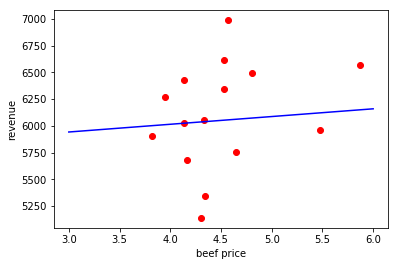

In [284]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION


y = result['Revenue'].values
x = result.drop('Revenue', axis = 1).values
model = LinearRegression()
model.fit(x,y)
sq = model.score(x,y)
print(sq)
print(model.coef_)
test_x = [[15, 200000000, 30000000000, 100, 200]]
current_x = [[4.46, 252960000, 51350880000, 203, 208]]
model.predict(test_x)
model.predict(current_x)

plot.scatter(result['Beef Price'].values ,y,color="red")
rg = np.array(range(3,7))
yrg = 72.273 * rg + (21470/3.75)
plot.plot(rg, yrg, color = 'blue')
plot.xlabel('beef price')
plot.ylabel('revenue')



21470.599199455617


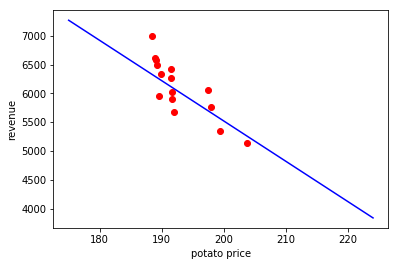

In [295]:
plot.scatter(result['Potato Price'].values ,y,color="red")
rg = np.array(range(175,225))
yrg = -69.9996639 * rg + (21470/1.1)
plot.plot(rg, yrg, color = 'blue')
plot.xlabel('potato price')
plot.ylabel('revenue')
print(model.intercept_)

(50,)


ValueError: x and y must be the same size

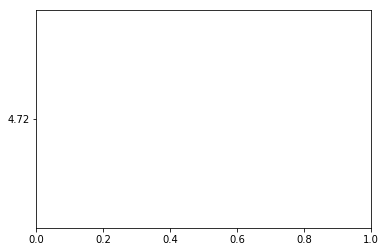

In [306]:
print(y.shape)
plot.scatter(result['Avg_Close'].values ,y,color="red")

rg = np.array(range(93,170))
yrg = -16.7 * rg + (21470/1.1)
plot.plot(rg, yrg, color = 'blue')
plot.xlabel('Avg Close')
plot.ylabel('revenue')
print(model.intercept_)

In [296]:
y = P_m_df['mp'].values
x = In_df['2015'].values.reshape(-1,1)
model2 = LinearRegression()
model2.fit(x,y)
print(model2.coef_)

[-3.07249327e-05]


# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*